In [115]:
from matplotlib import pyplot as plt
from data_utils import load_dataset
import random

In [116]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [117]:
def log_likelihood(y_train, estimate):
    likelihood = 0
    for i in range(len(y_train)):
        likelihood += y_train[i]*np.log(sigmoid(estimate[i])) + (1-y_train[i])*np.log(1-sigmoid(estimate[i]))
    return likelihood 

In [118]:
def get_acc(actual, pred):
    return (pred == actual).sum() / len(actual)

In [119]:
def run_Q1(model):
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')
    y_train, y_valid, y_test = y_train[:, (1,)], y_valid[:, (1,)], y_test[:, (1,)]
    iters = 4500 
    learn_rate = [0.0001, 0.001, 0.01]
    if model == 'SGD':
        for i in range(len(learn_rate)):
            test_acc, test_ll = sgd_gd(x_train, x_valid, x_test, y_train, y_valid, y_test,iters,learn_rate[i],SGD=True,GD=False)
    if model == 'GD':
        for i in range(len(learn_rate)):
            test_acc, test_ll = sgd_gd(x_train, x_valid, x_test, y_train, y_valid, y_test,iters,learn_rate[i],SGD=False,GD=True)

In [120]:
def sgd_gd(x_train, x_valid, x_test, y_train, y_valid, y_test,iters,learn_rate,SGD,GD):
    x_total = np.vstack([x_train, x_valid])
    y_total = np.vstack([y_train, y_valid])
    nll_train = []
    loss = []
    # Create X matrix (initialize x(i=0) to 1)
    X = np.ones((x_total.shape[0], x_total.shape[1]+1))
    X[:,1:] = x_total
    
    # Do the same with the test set 
    X_test = np.ones((x_test.shape[0],1))
    X_test = np.hstack([X_test, x_test])
    
    # Initialize weights to zero 
    # W = np.zeros((X.shape[0],1)) ## Dimension error 
    W = np.zeros(np.shape(X[0, :]))
    
    
    for i in range(iters):
        estimate = (np.dot(X , W).reshape(np.shape(y_total)))

        if SGD: # Mini-batch 
            ind = np.random.randint(y_total.shape[0])
            grad = (y_total[ind] - sigmoid(estimate[ind]) ) * X[ind,:]
        elif GD: # Full-batch 
            grad = np.zeros(np.shape(W))
            for ind in range(len(y_total)):
                grad += (y_total[ind] - sigmoid(estimate[ind])) * X[ind,:] # Sum over all
                
        # Use the gradient to update weights 
        W = np.add(W, learn_rate*grad)
        
        # Compute the negative log-likelihood  
        nll = -1*log_likelihood(y_total, estimate)
        nll_train.append(nll)
    
        L = 0
        for i in range(len(estimate)):
            prob = sigmoid(estimate[i])
            if prob > 0.5:
                L += np.square(1 -y_total[i])
            elif prob < 0.5:
                L += np.square(0 -y_total[i])
            else:
                L += np.square(-1 -y_total[i])

#         for i in range(len(estimate)):
#             print(estimate[i], y_total[i], 'WHASHKGTAJREHS')
#             L += np.square(estimate[i]-y_total[i])
#         print(L, 'loss')
        loss.append(L/len(estimate))
    
    # Now that we've trained on the train and validation test set, we can apply the trained weights to predict on the test set 
    test_estimate = (np.dot(X_test, W)).reshape(y_test.shape) # Test estimate 
    
    preds = []

    for i in range(len(y_test)):
        prob = sigmoid(test_estimate[i])
        if prob > 0.5:
            preds.append([1])
        elif prob < 0.5:
            preds.append([0])    
        else:
            preds.append([-1])

    test_acc = (get_acc(y_test, preds))
    test_ll = (log_likelihood(y_test, test_estimate))
    print("Test Accuracy (n = " + str(learn_rate) + ") : " + str(test_acc))
    print("Test NLL (n = " + str(learn_rate) + ") : " +str(test_ll[0]))
    
    # Plot 
    x_axis = list(range(iters))
    if GD:
        plt.figure(1)
        plt.title('GD Full-Batch Neg Log-Likelihood')
        plt.xlabel('Iterations')
        plt.ylabel('NLL')
        plt.plot(x_axis, nll_train, label='Neg Log-L for n = ' + str(learn_rate))
        plt.legend(loc= 'upper right')
        plt.savefig('GD.png')
        
        plt.figure(2)
        plt.title('GD Full-Batch Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')        
        plt.plot(x_axis, loss, label='Neg Log-L for n = ' + str(learn_rate))
        plt.legend(loc= 'upper right')
        plt.savefig('GD_LOSS.png')
    
    elif SGD:
        plt.figure(3)
        plt.title('SGD Mini-Batch (1) Neg Log-Likelihood')
        plt.xlabel('Iterations')
        plt.ylabel('NLL')
        plt.plot(x_axis, nll_train, label='Loss for n = ' + str(learn_rate))
        plt.legend()
        plt.savefig('SGD.png')

        plt.figure(4)
        plt.title('SGD Mini-Batch (1) Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')        
        plt.plot(x_axis, loss, label='Loss for n = ' + str(learn_rate))
        plt.legend(loc= 'upper right')
        plt.savefig('SGD_LOSS.png')
    return [test_acc, test_ll]

Test Accuracy (n = 0.0001) : 0.7333333333333333
Test NLL (n = 0.0001) : -7.103857102347027
Test Accuracy (n = 0.001) : 0.6666666666666666
Test NLL (n = 0.001) : -6.95662307832449
Test Accuracy (n = 0.01) : 0.7333333333333333
Test NLL (n = 0.01) : -6.912966520904519


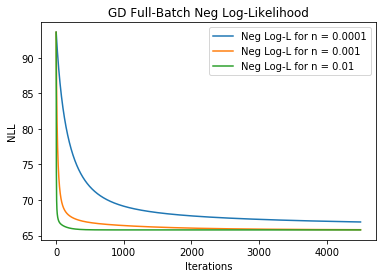

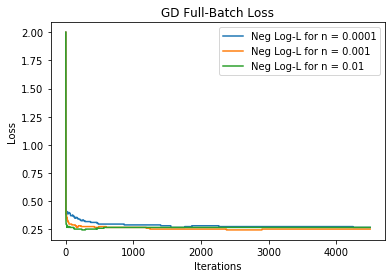

In [121]:
run_Q1(model = "GD")

Test Accuracy (n = 0.0001) : 0.6
Test NLL (n = 0.0001) : -9.904636320564894
Test Accuracy (n = 0.001) : 0.6666666666666666
Test NLL (n = 0.001) : -8.118155166786842
Test Accuracy (n = 0.01) : 0.6666666666666666
Test NLL (n = 0.01) : -7.437887824319715


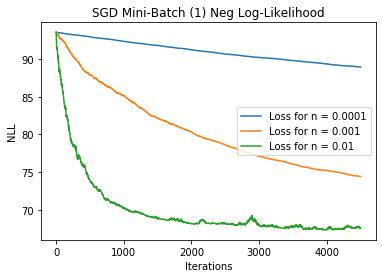

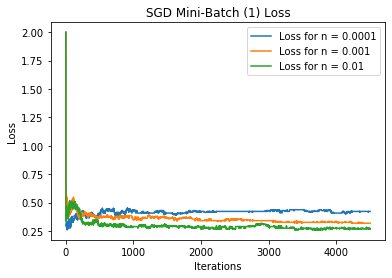

In [123]:
run_Q1(model = "SGD")